In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import functions as f
import pandas as pd

url_1 = '../data/raw/SYB67_176_202411_Tourist-Visitors Arrival and Expenditure.csv'
df_1 = pd.read_csv(url_1)

url_2 = '../data/raw/SYB67_285_202411_Research and Development Expenditure and Staff.csv'
df_2 = pd.read_csv(url_2)

url_3 = '../data/raw/SYB67_328_202411_Intentional homicides and other crimes.csv'
df_3 = pd.read_csv(url_3)

url_4 = '../data/raw/SYB67_329_202411_Labour Force and Unemployment.csv'
df_4 = pd.read_csv(url_4)

#Function to clean rows and columns
df_1 = f.clean_row_column(df_1,url_1)
df_2 = f.clean_row_column(df_2,url_2)
df_3 = f.clean_row_column(df_3,url_3)
df_4 = f.clean_row_column(df_4,url_4)


#Function to insert column type
df_1 = f.insert_column(df_1,"Type","Tourism")
df_2 = f.insert_column(df_2,"Type","R&D")
df_3 = f.insert_column(df_3,"Type","Crime")
df_4 = f.insert_column(df_4,"Type","Labour & Unemployment")

#Concat all the dataframes.
df = pd.concat([df_1,df_2,df_3,df_4], axis=0)

#Fill N/A values.
df = df.fillna("N/A")

#Format column names
df.rename(columns={ col: col.rstrip().replace(" ", "_").lower() for col in df.columns}, inplace=True)

#Drop irrelevant columns
df = df.drop(columns=['source','tourism_arrivals_series_type_footnote'])

# #Replace N/A values for tourism_arrivals_series_type column
df.loc[df['type'] == 'Tourism', 'tourism_arrivals_series_type'] = df.loc[df['type'] == 'Tourism', 'tourism_arrivals_series_type'].replace("N/A", "TE")

#Convert the data type of value column to float as well check if value is string and then remove the commas also
df['value'] = df['value'].astype(str).str.replace(',', '').astype(float)

# Apply the function to create a new column 'Continent'
df['continent'] = df['region/country/area'].apply(f.get_continent)

# Display the DataFrame with the new column
df



,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
0,Afghanistan,2010,Tourism expenditure (millions of US dollars),Tourism,TE,147.0,N/A,Asia
1,Afghanistan,2020,Tourism expenditure (millions of US dollars),Tourism,TE,75.0,N/A,Asia
2,Albania,2010,Tourist/visitor arrivals (thousands),Tourism,TF,2191.0,Excluding nationals residing abroad.,Europe
3,Albania,2020,Tourist/visitor arrivals (thousands),Tourism,TF,2604.0,Excluding nationals residing abroad.,Europe
4,Albania,2021,Tourist/visitor arrivals (thousands),Tourism,TF,5515.0,Excluding nationals residing abroad.,Europe
...,...,...,...,...,...,...,...,...
5481,European Union (EU),2024,Unemployment rate - Total,Labour & Unemployment,N/A,6.0,Estimate.,Other
5482,European Union (EU),2024,Labour force participation - Male,Labour & Unemployment,N/A,63.9,Estimate.,Other
5483,European Union (EU),2024,Unemployment rate - Male,Labour & Unemployment,N/A,5.7,Estimate.,Other
5484,European Union (EU),2024,Labour force participation - Female,Labour & Unemployment,N/A,51.8,Estimate.,Other


In [3]:
df.columns

Index(['region/country/area', 'year', 'series', 'type',
       'tourism_arrivals_series_type', 'value', 'footnotes', 'continent'],
      dtype='object')

In [4]:
df['region/country/area'].nunique()

272

In [5]:
df['region/country/area'].value_counts()

region/country/area
United Kingdom                83
Costa Rica                    82
Guatemala                     80
New Zealand                   80
Bolivia (Plurin. State of)    79
                              ..
Saba                           3
Sint Eustatius                 3
Saint Martin (French part)     2
Gibraltar                      1
Mayotte                        1
Name: count, Length: 272, dtype: int64

In [6]:
df['region/country/area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Dem. Rep. of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guin

In [7]:
df.columns

Index(['region/country/area', 'year', 'series', 'type',
       'tourism_arrivals_series_type', 'value', 'footnotes', 'continent'],
      dtype='object')

In [8]:
# Size of data for type as Tourism
df_tourism=df[df["type"] == "Tourism"]
display(df_tourism)



,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
0,Afghanistan,2010,Tourism expenditure (millions of US dollars),Tourism,TE,147.0,N/A,Asia
1,Afghanistan,2020,Tourism expenditure (millions of US dollars),Tourism,TE,75.0,N/A,Asia
2,Albania,2010,Tourist/visitor arrivals (thousands),Tourism,TF,2191.0,Excluding nationals residing abroad.,Europe
3,Albania,2020,Tourist/visitor arrivals (thousands),Tourism,TF,2604.0,Excluding nationals residing abroad.,Europe
4,Albania,2021,Tourist/visitor arrivals (thousands),Tourism,TF,5515.0,Excluding nationals residing abroad.,Europe
...,...,...,...,...,...,...,...,...
2149,Zimbabwe,2022,Tourist/visitor arrivals (thousands),Tourism,VF,1044.0,N/A,Africa
2150,Zimbabwe,1995,Tourism expenditure (millions of US dollars),Tourism,TE,145.0,N/A,Africa
2151,Zimbabwe,2005,Tourism expenditure (millions of US dollars),Tourism,TE,99.0,N/A,Africa
2152,Zimbabwe,2010,Tourism expenditure (millions of US dollars),Tourism,TE,135.0,N/A,Africa


In [9]:
#no of unique countries/region/areas 
df_tourism['region/country/area'].nunique()

219

In [10]:
df_tourism['year'].unique()

array([2010, 2020, 2021, 2022, 1995, 2005])

In [11]:
# Size of data for type as Tourism and tourism_arrivals_series_type as TE
df_tourism_Exp = df[(df["type"] == "Tourism") & (df["tourism_arrivals_series_type"] == 'TE')]
display(df_tourism_Exp)


,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
0,Afghanistan,2010,Tourism expenditure (millions of US dollars),Tourism,TE,147.0,N/A,Asia
1,Afghanistan,2020,Tourism expenditure (millions of US dollars),Tourism,TE,75.0,N/A,Asia
6,Albania,1995,Tourism expenditure (millions of US dollars),Tourism,TE,70.0,N/A,Europe
7,Albania,2005,Tourism expenditure (millions of US dollars),Tourism,TE,880.0,N/A,Europe
8,Albania,2010,Tourism expenditure (millions of US dollars),Tourism,TE,1778.0,N/A,Europe
...,...,...,...,...,...,...,...,...
2143,Zambia,2022,Tourism expenditure (millions of US dollars),Tourism,TE,829.0,Excluding passenger transport.,Africa
2150,Zimbabwe,1995,Tourism expenditure (millions of US dollars),Tourism,TE,145.0,N/A,Africa
2151,Zimbabwe,2005,Tourism expenditure (millions of US dollars),Tourism,TE,99.0,N/A,Africa
2152,Zimbabwe,2010,Tourism expenditure (millions of US dollars),Tourism,TE,135.0,N/A,Africa


In [12]:
df_tourism_Exp['tourism_arrivals_series_type'].isna().sum()

np.int64(0)

In [13]:
df_tourism_Exp['tourism_arrivals_series_type'].isnull().sum()

np.int64(0)

In [14]:
nan_count = df_tourism_Exp["tourism_arrivals_series_type"].isna().sum()
print(nan_count)

0


In [15]:
df_tourism.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2153
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region/country/area           2154 non-null   object 
 1   year                          2154 non-null   int64  
 2   series                        2154 non-null   object 
 3   type                          2154 non-null   object 
 4   tourism_arrivals_series_type  2154 non-null   object 
 5   value                         2154 non-null   float64
 6   footnotes                     2154 non-null   object 
 7   continent                     2154 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 151.5+ KB


###  Series International Tourist Arrivals
TF: International tourist arrivals at frontiers (excluding same-day visitors);
VF: International visitor arrivals at frontiers (tourists and same-day visitors);
THS: International tourist arrivals at hotels and similar establishments;
TCE: International tourist arrivals at collective tourism establishments;
NHS: Nights of international tourists in hotels and similar establishments;
NCE: Nights of international tourists in collective tourism establishments.

In [16]:
# group the data using tourism_arrivals_series_type to see different categories
df_tour=df_tourism.groupby("tourism_arrivals_series_type")["value"].sum()
print(df_tour)

tourism_arrivals_series_type
TCE     577866.0
TE     4644076.0
TF     2883608.0
THS       6684.0
VF      503934.0
Name: value, dtype: float64


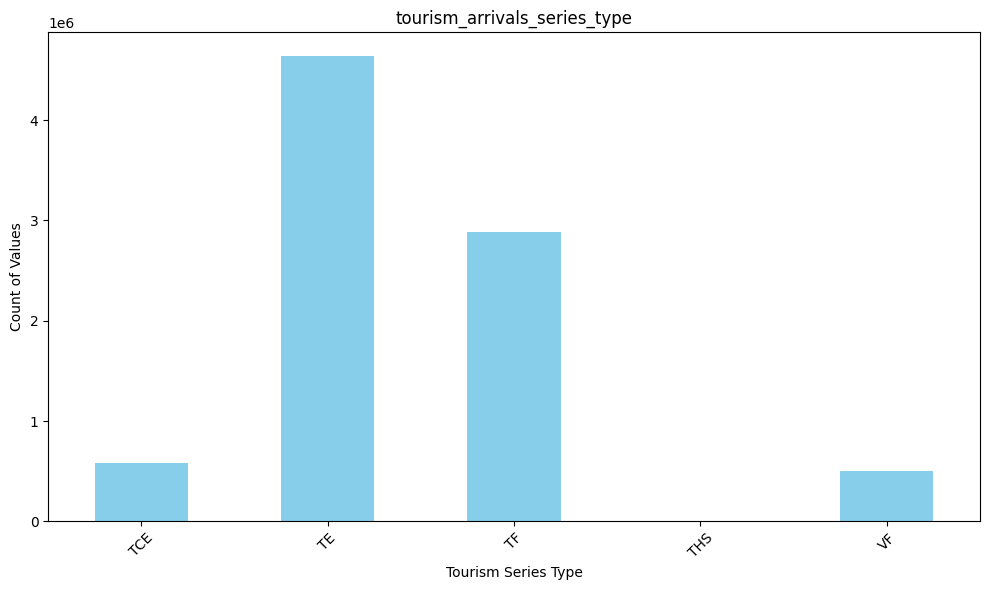

In [17]:
#create bar chart for same
import matplotlib.pyplot as plt

# Plotting a bar chart
df_tour.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Adding labels and title
plt.title('tourism_arrivals_series_type')
plt.xlabel('Tourism Series Type')
plt.ylabel('Count of Values')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()

In [18]:
# group data by area/region and by tourist series
df_grouped = df_tourism.groupby(['region/country/area', 'tourism_arrivals_series_type'])['value'].sum().reset_index()
df_grouped_sorted = df_grouped.sort_values(by='value', ascending=False)
#df_grouped_sorted = df_grouped_sorted.head(20)
display(df_grouped_sorted)

,region/country/area,tourism_arrivals_series_type,value
408,United States of America,TE,706175.0
140,France,TF,301747.0
139,France,TE,287429.0
360,Spain,TF,263335.0
359,Spain,TE,260334.0
...,...,...,...
392,Tuvalu,TE,5.0
393,Tuvalu,TF,5.0
277,Niue,TE,5.0
126,Equatorial Guinea,TE,1.0


In [19]:
# Create a pivot table to see the sum of values for TF, VF, and other types by region/country/area
df_pivot = df_grouped_sorted.pivot_table(index='region/country/area', columns='tourism_arrivals_series_type', values='value', aggfunc='sum')

# Print the pivot table
display(df_pivot)


tourism_arrivals_series_type,TCE,TE,TF,THS,VF
region/country/area,,,,,
Afghanistan,NaN,222.0,NaN,NaN,NaN
Albania,NaN,9706.0,17415.0,NaN,NaN
Algeria,NaN,1149.0,NaN,NaN,6147.0
American Samoa,NaN,NaN,83.0,NaN,NaN
Andorra,NaN,3244.0,11602.0,NaN,NaN
...,...,...,...,...,...
Venezuela (Boliv. Rep. of),NaN,2602.0,1932.0,NaN,NaN
Viet Nam,NaN,10131.0,NaN,NaN,17533.0
Yemen,NaN,1291.0,1422.0,NaN,NaN


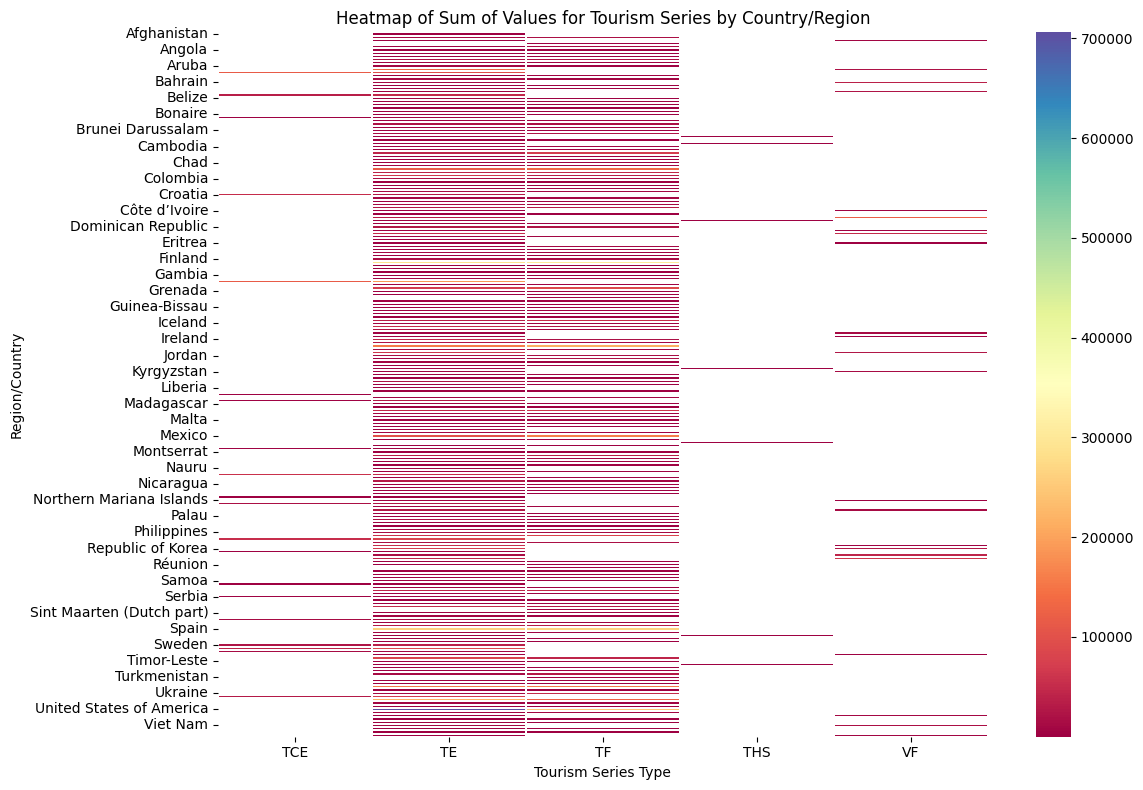

In [20]:
# Pivot the table to create a matrix for the heatmap
df_pivot = df_grouped_sorted.pivot(index='region/country/area', columns='tourism_arrivals_series_type', values='value')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=False, fmt=".1f", cmap='Spectral', linewidths=0.3)

# Add title and labels
plt.title('Heatmap of Sum of Values for Tourism Series by Country/Region')
plt.xlabel('Tourism Series Type')
plt.ylabel('Region/Country')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Size of data for type as Tourism and tourism_arrivals_series_type as TE
df_tourism_Exp = df[(df["type"] == "Tourism") & (df["tourism_arrivals_series_type"] == 'TE')]
display(df_tourism_Exp)

,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
0,Afghanistan,2010,Tourism expenditure (millions of US dollars),Tourism,TE,147.0,N/A,Asia
1,Afghanistan,2020,Tourism expenditure (millions of US dollars),Tourism,TE,75.0,N/A,Asia
6,Albania,1995,Tourism expenditure (millions of US dollars),Tourism,TE,70.0,N/A,Europe
7,Albania,2005,Tourism expenditure (millions of US dollars),Tourism,TE,880.0,N/A,Europe
8,Albania,2010,Tourism expenditure (millions of US dollars),Tourism,TE,1778.0,N/A,Europe
...,...,...,...,...,...,...,...,...
2143,Zambia,2022,Tourism expenditure (millions of US dollars),Tourism,TE,829.0,Excluding passenger transport.,Africa
2150,Zimbabwe,1995,Tourism expenditure (millions of US dollars),Tourism,TE,145.0,N/A,Africa
2151,Zimbabwe,2005,Tourism expenditure (millions of US dollars),Tourism,TE,99.0,N/A,Africa
2152,Zimbabwe,2010,Tourism expenditure (millions of US dollars),Tourism,TE,135.0,N/A,Africa


In [22]:
# group data by continent and by tourist series
df_grouped = df_tourism.groupby(['continent', 'tourism_arrivals_series_type'])['value'].sum().reset_index()
df_grouped_sorted = df_grouped.sort_values(by='value', ascending=False)

print(df_grouped_sorted)

   continent tourism_arrivals_series_type      value
13    Europe                           TE  2204644.0
14    Europe                           TF  1505393.0
4   Americas                           TE  1108481.0
8       Asia                           TE   941674.0
5   Americas                           TF   688671.0
12    Europe                          TCE   536849.0
9       Asia                           TF   520335.0
16    Europe                           VF   246303.0
0     Africa                           TE   201112.0
17   Oceania                           TE   161466.0
1     Africa                           TF   153028.0
11      Asia                           VF   149099.0
3     Africa                           VF    67509.0
7       Asia                          TCE    41017.0
20     Other                           TE    26699.0
19   Oceania                           VF    20783.0
18   Oceania                           TF    16181.0
21     Other                           VF    1

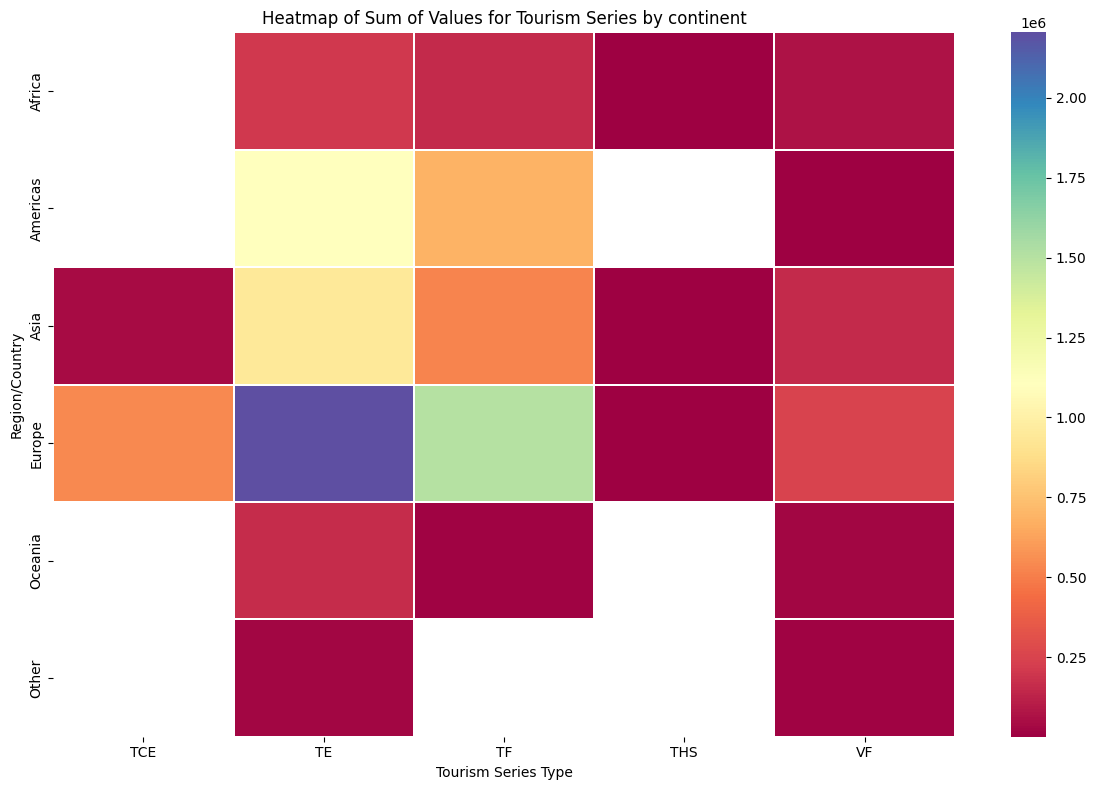

In [23]:
# Pivot the table to create a matrix for the heatmap
df_pivot = df_grouped.pivot(index='continent', columns='tourism_arrivals_series_type', values='value')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=False, fmt=".1f", cmap='Spectral', linewidths=0.3)

# Add title and labels
plt.title('Heatmap of Sum of Values for Tourism Series by continent')
plt.xlabel('Tourism Series Type')
plt.ylabel('Region/Country')

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
# Size of data for type as Tourism and tourism_arrivals_series_type as TE
df_tourism_europe = df_tourism[(df_tourism["continent"] == "Europe")]
display(df_tourism_europe)

,region/country/area,year,series,type,tourism_arrivals_series_type,value,footnotes,continent
2,Albania,2010,Tourist/visitor arrivals (thousands),Tourism,TF,2191.0,Excluding nationals residing abroad.,Europe
3,Albania,2020,Tourist/visitor arrivals (thousands),Tourism,TF,2604.0,Excluding nationals residing abroad.,Europe
4,Albania,2021,Tourist/visitor arrivals (thousands),Tourism,TF,5515.0,Excluding nationals residing abroad.,Europe
5,Albania,2022,Tourist/visitor arrivals (thousands),Tourism,TF,7105.0,Excluding nationals residing abroad.,Europe
6,Albania,1995,Tourism expenditure (millions of US dollars),Tourism,TE,70.0,N/A,Europe
...,...,...,...,...,...,...,...,...
2047,United Kingdom,2005,Tourism expenditure (millions of US dollars),Tourism,TE,34252.0,Excluding passenger transport.,Europe
2048,United Kingdom,2010,Tourism expenditure (millions of US dollars),Tourism,TE,38567.0,Excluding passenger transport.,Europe
2049,United Kingdom,2020,Tourism expenditure (millions of US dollars),Tourism,TE,26668.0,Excluding passenger transport.,Europe
2050,United Kingdom,2021,Tourism expenditure (millions of US dollars),Tourism,TE,32959.0,Excluding passenger transport.,Europe


In [25]:
df_time_series = df_tourism_europe.groupby(["year", "tourism_arrivals_series_type"])["value"].sum().reset_index()


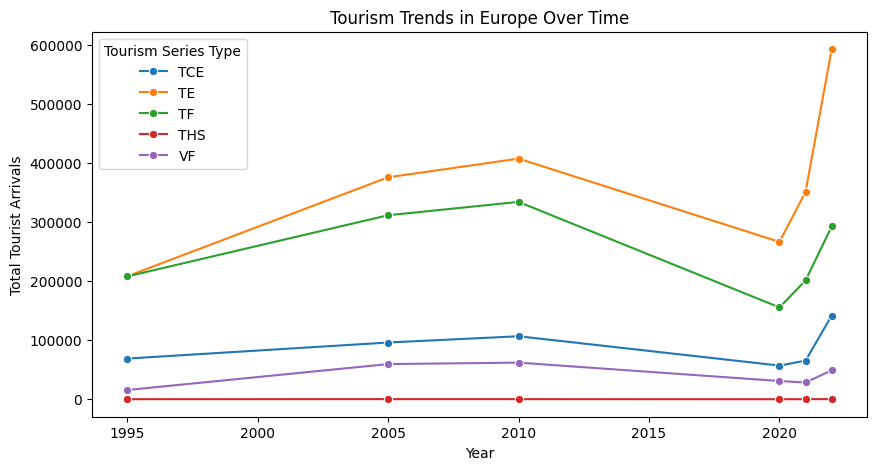

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_time_series, x="year", y="value", hue="tourism_arrivals_series_type", marker="o")

plt.xlabel("Year")
plt.ylabel("Total Tourist Arrivals")
plt.title("Tourism Trends in Europe Over Time")
plt.legend(title="Tourism Series Type")
plt.show()

In [27]:
df_tourism_europe_country=df_tourism_europe['region/country/area'].unique()

In [28]:
df_tourism_europe_country=df_tourism_europe.groupby(['region/country/area', 'tourism_arrivals_series_type'])['value'].sum().reset_index()
df_tourism_europe_country_TF = df_tourism_europe_country[df_tourism_europe_country["tourism_arrivals_series_type"] == "TF"]
df_grouped_sorted = df_tourism_europe_country_TF.sort_values(by='value', ascending=False)

print(df_grouped_sorted)

   region/country/area tourism_arrivals_series_type     value
31              France                           TF  301747.0
83               Spain                           TF  263335.0
45               Italy                           TF  213080.0
89             Türkiye                           TF  154992.0
93      United Kingdom                           TF  126411.0
37              Greece                           TF   89817.0
65              Poland                           TF   80973.0
91             Ukraine                           TF   51837.0
39             Hungary                           TF   50362.0
23             Czechia                           TF   29101.0
17            Bulgaria                           TF   23497.0
43             Ireland                           TF   19285.0
1              Albania                           TF   17415.0
29             Finland                           TF   12419.0
3              Andorra                           TF   11602.0
21      

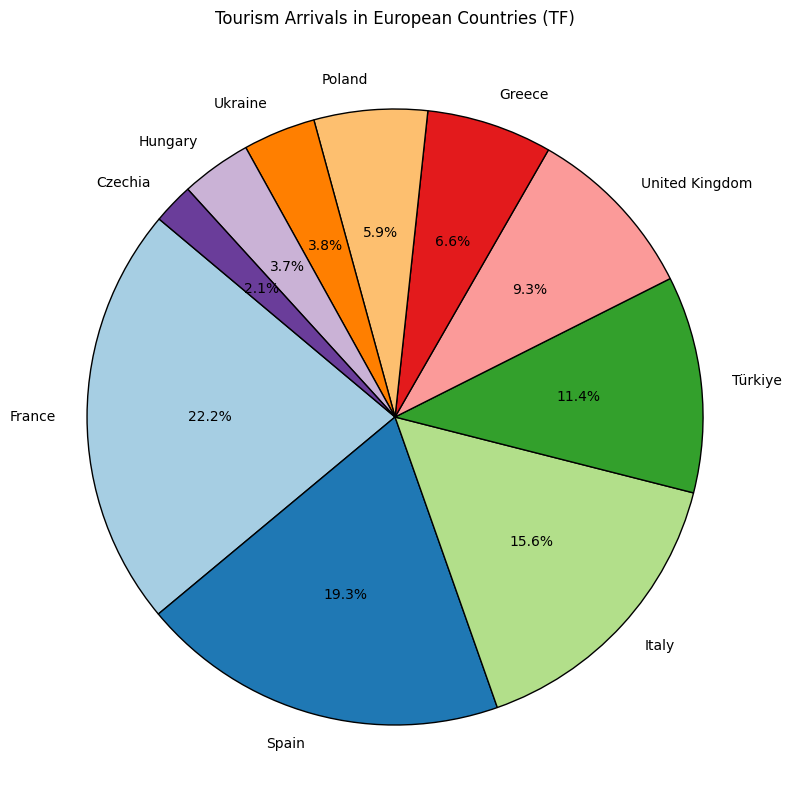

In [29]:
df_pie = df_grouped_sorted.head(10)
# Set figure size
plt.figure(figsize=(10, 10))

# Create pie chart
plt.pie(df_pie["value"], labels=df_pie["region/country/area"], autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Set title
plt.title("Tourism Arrivals in European Countries (TF)")

# Show the pie chart
plt.show()

### R&D Section

#### Gross domestic expenditure on R&D: as a percentage of GDP

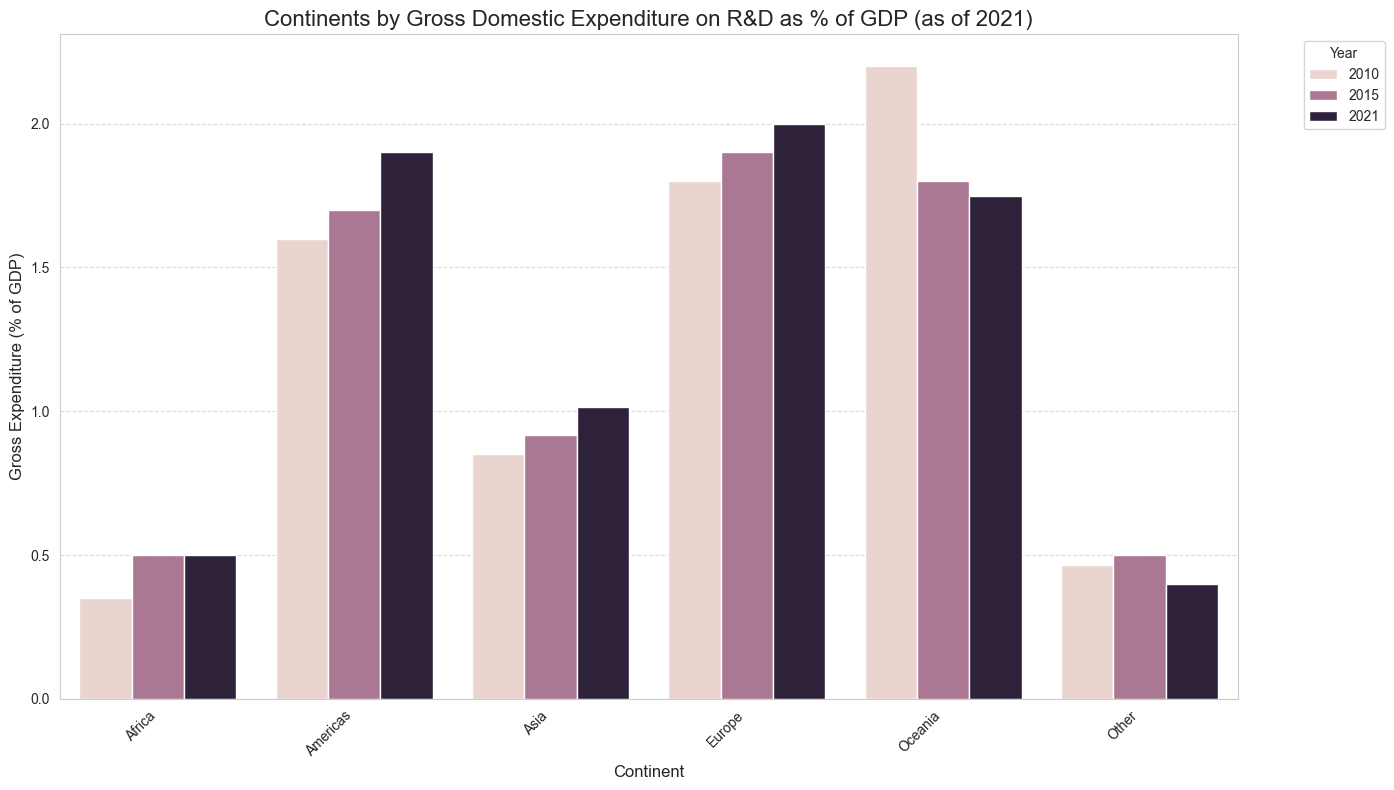

In [51]:
# Filter for R&D type
df_rd = df[(df['type'] == 'R&D')]

# Define the series of interest
gross_exp = 'Gross domestic expenditure on R&D: as a percentage of GDP'

# Regions to exclude
filtered_list = [
    'Americas', 'Northern America', 'Latin America & the Caribbean', 'Eastern Africa', 
    'Middle Africa', 'Southern Africa', 'Western Africa', 'Caribbean', 'Central America', 
    'South America', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Asia', 
    'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
    'European Union (EU)', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 
    'Western Europe', 'LDC§', 'Total, all countries or areas', 'SIDS', 'South-central Asia', 'LLDCs',
    'Oceania','Australia and New Zealand'
]

# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == gross_exp) &
    (df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['region/country/area'] != 'Total, all countries or areas') &
    (df_rd['year'] >= 2010)
]

# Aggregate data at region level and year
continent_data = filtered_data.groupby(['year', 'continent'])['value'].mean().reset_index()

# Rename the 'value' column for clarity
continent_data.rename(columns={'value': 'Gross Domestic Expenditure on R&D: as % GDP'}, inplace=True)

# Get the **top 10 regions** based on the latest available year's R&D expenditure
latest_year = continent_data['year'].max()
top_10_regions = continent_data[continent_data['year'] == latest_year].nlargest(10, 'Gross Domestic Expenditure on R&D: as % GDP')

# Filter the dataset to only include the top 10 regions across all years
filtered_top_10 = continent_data[continent_data['continent'].isin(top_10_regions['continent'])]

# Pivot table with year and region as hierarchical index
pivot_table = filtered_top_10.pivot_table(index=['year', 'continent'], values='Gross Domestic Expenditure on R&D: as % GDP', aggfunc='mean')

# Convert pivot table to a flat format for plotting
pivot_table_flat = pivot_table.reset_index()

# Convert values back to numeric for plotting
pivot_table_flat['value_numeric'] = pivot_table_flat['Gross Domestic Expenditure on R&D: as % GDP']

# Plot the data grouped by region (X-axis) and year (with hue)
plt.figure(figsize=(14, 8))
sns.barplot(data=pivot_table_flat, x='continent', y='value_numeric', hue='year', dodge=True)

# Chart styling
plt.title(f'Continents by Gross Domestic Expenditure on R&D as % of GDP (as of {latest_year})', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Gross Expenditure (% of GDP)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == gross_exp) &
    (~df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'] >= 2010)
]

# Aggregate data at region/country level and year
country_data = filtered_data.groupby(['year', 'region/country/area'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
country_data.rename(columns={'value': 'Gross Domestic Expenditure on R&D: as % GDP'}, inplace=True)

# Pivot table with year and region as hierarchical index
pivot_table = country_data.pivot_table(index=['year', 'region/country/area'], values='Gross Domestic Expenditure on R&D: as % GDP', aggfunc='sum')

# Sort by highest value first, then by year
pivot_table = pivot_table.sort_values(by=['Gross Domestic Expenditure on R&D: as % GDP', 'year'], ascending=[False, True])

display(pivot_table.head(10))

Gross Domestic Expenditure on R&D: as % GDP
year region/country/area                                                  
2021 Israel                                                            5.6
     Republic of Korea                                                 4.9
2015 Israel                                                            4.2
     Republic of Korea                                                 4.0
2010 Israel                                                            3.9
     Finland                                                           3.7
2020 United States of America                                          3.5
2021 United States of America                                          3.5
     Belgium                                                           3.4
     Sweden                                                            3.4

#### Researchers per million inhabitants (FTE) 

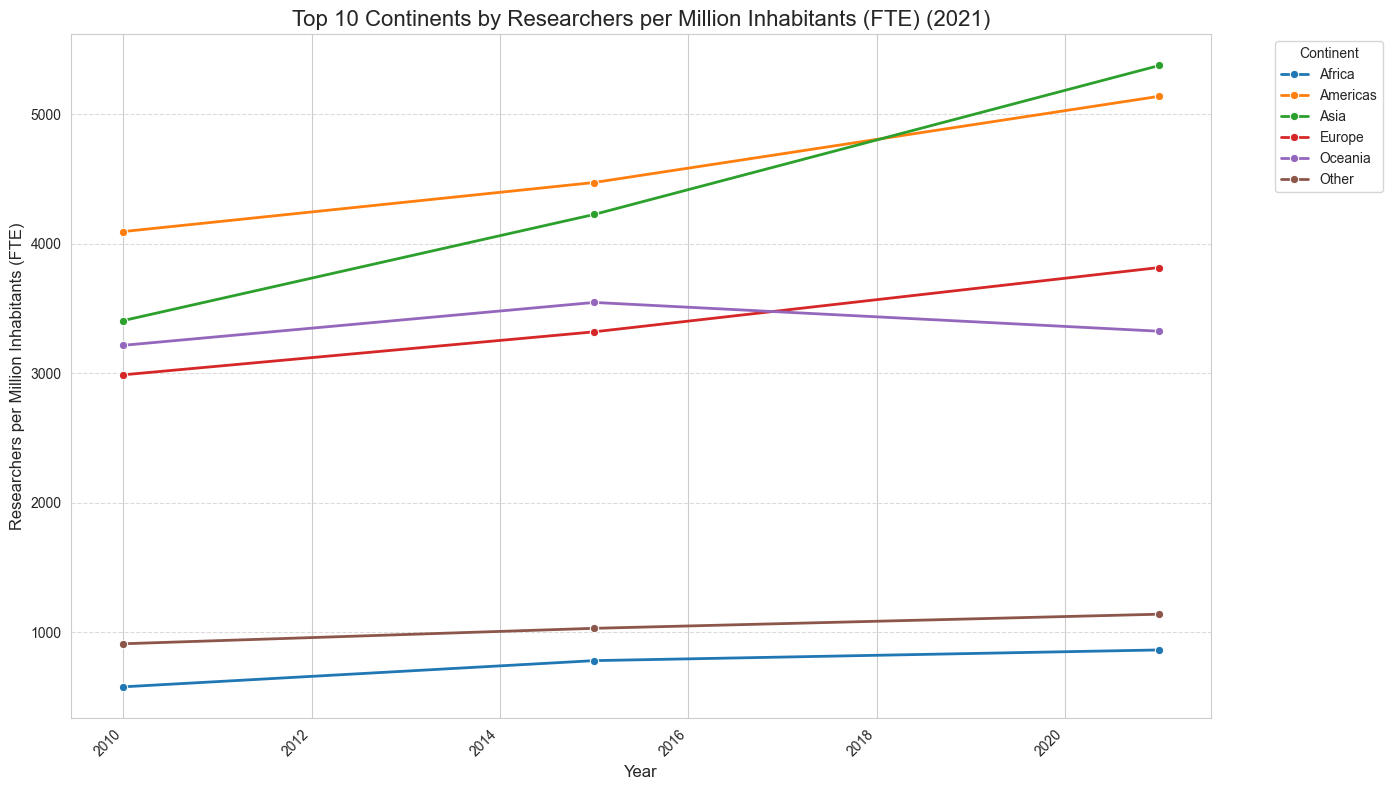

In [39]:
# Define the series of interest
researchers = 'Researchers per million inhabitants (FTE)'

# Regions to exclude
filtered_list = [
    'Americas', 'Northern America', 'Latin America & the Caribbean', 'Eastern Africa', 
    'Middle Africa', 'Southern Africa', 'Western Africa', 'Caribbean', 'Central America', 
    'South America', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Asia', 
    'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
    'European Union (EU)', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 
    'Western Europe', 'LDC§', 'Total, all countries or areas', 'SIDS', 'South-central Asia', 'LLDCs',
    'Oceania'
]

# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == researchers) &
    (df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'] >= 2010) &
    (df_rd['region/country/area'] != 'Total, all countries or areas')
]

# Aggregate data at continent
continent_data = filtered_data.groupby(['year', 'continent'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
continent_data.rename(columns={'value': 'Researchers per million inhabitants (FTE)'}, inplace=True)

# Get the **top 10 regions**
latest_year = continent_data['year'].max()
top_10_continent = continent_data[continent_data['year'] == latest_year].nlargest(10, 'Researchers per million inhabitants (FTE)')

# Filter the dataset to only include the top 10 continents across all years
filtered_top_10 = continent_data[continent_data['continent'].isin(top_10_continent['continent'])]

# Pivot table with year and continents as hierarchical index
pivot_table = filtered_top_10.pivot_table(index=['year', 'continent'], values='Researchers per million inhabitants (FTE)', aggfunc='sum')

# Convert pivot table to a flat format for plotting
pivot_table_flat = pivot_table.reset_index()

# Convert values back to numeric for plotting
pivot_table_flat['value_numeric'] = pivot_table_flat['Researchers per million inhabitants (FTE)']

# Plot the data grouped by continents (X-axis) and year (with hue)
sns.set_style("whitegrid")

# Plot the data with a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=pivot_table_flat, 
    x='year', 
    y='value_numeric', 
    hue='continent', 
    marker='o', 
    linewidth=2
)

# Chart styling
plt.title(f'Top 10 Continents by Researchers per Million Inhabitants (FTE) ({latest_year})', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Researchers per Million Inhabitants (FTE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
# Filter data (exclude rows with missing values in relevant columns)
filtered_data = df_rd[
    (~df_rd['value'].isnull()) & 
    (~df_rd['continent'].isnull()) & 
    (~df_rd['year'].isnull()) & 
    (df_rd['series'] == researchers) &
    (~df_rd['region/country/area'].isin(filtered_list)) &
    (df_rd['year'] >= 2010)
]

# Aggregate data at region/country level and year
country_data = filtered_data.groupby(['year', 'region/country/area'])['value'].sum().reset_index()

# Rename the 'value' column for clarity
country_data.rename(columns={'value': 'Researchers per million inhabitants (FTE)'}, inplace=True)

# Pivot table with year and region as hierarchical index
pivot_table = country_data.pivot_table(index=['year', 'region/country/area'], values='Researchers per million inhabitants (FTE)', aggfunc='sum')

# Sort by highest value first, then by year
pivot_table = pivot_table.sort_values(by=['Researchers per million inhabitants (FTE)', 'year'], ascending=[False, True])

#Formatting
pivot_table = pivot_table.map(lambda x: f"{x:,.2f}" if isinstance(x, (int, float)) else x)

display(pivot_table.head(10))

Researchers per million inhabitants (FTE)
year region/country/area                                          
2021 Republic of Korea                                    9,081.90
     Sweden                                               8,130.80
     Finland                                              7,870.70
2010 Finland                                              7,741.00
2021 Denmark                                              7,707.70
2015 Denmark                                              7,561.00
2021 Norway                                               7,227.90
2020 Singapore                                            7,224.70
2015 Republic of Korea                                    7,018.40
     Singapore                                            6,977.70